# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024
* Fernando Falkenberg INPE 09 Oct 2025

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to the files, which are sparc4-pipeline products.

In [2]:
path = '/media/fernando/KINGSTON/Doutorado/2025/reduced/'
date = '20250705'
object = 'V462Lup'
channel = '2'

In [3]:
db_example = f'{path}{date}/sparc4acs{channel}/{date}_sparc4acs{channel}_db.csv'
# Esse arquivo é uma tabela que contém informações de todas as imagens daquela noite, naquele canal, por exemplo, diretório, tempo de exposição, posição da lâmina, etc.

phot_lightcurve_example =f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_S+N_lc.fits'
# Esse arquivo contém várias tabelas dentro dele, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela, estão informações de cada uma das fontes detectadas pelo pipeline, para cada imagem daquele objeto, por exemplo, RA, Dec, magnitude (com seu erro), fwhm, etc.

polar_stack_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_stack.fits'
# Esse arquivo contém várias tabelas dentro dele, duas para cada abertura em que os dados do objeto foram processados (sendo uma para o feixe ordinário e a outra para o feixe extraordinário). Cada tabela contém uma linha para cada fonte identificada pelo pipeline. Para cada linha, existem informações como RA, Dec, magnitude (com seu erro), fwhm, etc. É uma versão do arquivo logo acima, só que para apenas uma imagem stack.

polar_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_Gain2_1.0_Conventional_2_{object}_POLAR_L4_polar.fits'
# Esse arquivo contém várias tabelas, uma pra cada abertura em que os dados do objeto foram processados. Dentro de cada tabela existe uma linha para cada fonte detectada pelo pipeline. Em cada linha estão os resultados da polarimetria para aquela fonte, por exemplo, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... Além disso, também estão as contagens para cada posição de lâmina, para cada fonte, para cada imagem, com seus erros. É nesse arquivo que estão os dados importantes.

polar_time_series_example = f'{path}{date}/sparc4acs{channel}/{date}_s4c{channel}_{object}_POLAR_L4_ts.fits'
# Esse arquivo contém uma tabela com os dados da série temporal polarimétrica das fontes detectadas pelo pipeline, por exemplo, RA, Dec, x1, y1, x2, y2, mag, emag, Q, U, V, P, theta, fwhm, zero, ezero, k, chi2, rms... O resultado aqui é para cada conjunto de uma medida polarimétrica.

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipeline` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [4]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:57:57.582000,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
1,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:58:48.702075,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
2,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T21:59:39.822151,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
3,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:00:30.942227,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
4,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-05T22:01:22.062303,50.0,16:16:38.2,-14:49:19,I3ATLAS,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,1,L2,None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:01.252000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,12,L4,None,True
8857,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T08:59:43.702000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,13,L4,None,True
8858,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:00:26.287000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,14,L4,None,True
8859,/media/fernando/KINGSTON/Doutorado/2025/202507...,2025-07-06T09:01:08.932000,40.0,22:17:55.38,-08:21:03.70,FOAqr,OBJECT,POLAR,2,1,...,Normal,9915,Gain 2,1.0,Conventional,2,15,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [5]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs2/20250705_s4c2_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     170   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   7R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   7R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   7R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   7R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   7R x 13C   [I11, D25.17, D25.1

Then we plot the science frame using the `sparc4.product_plots` library

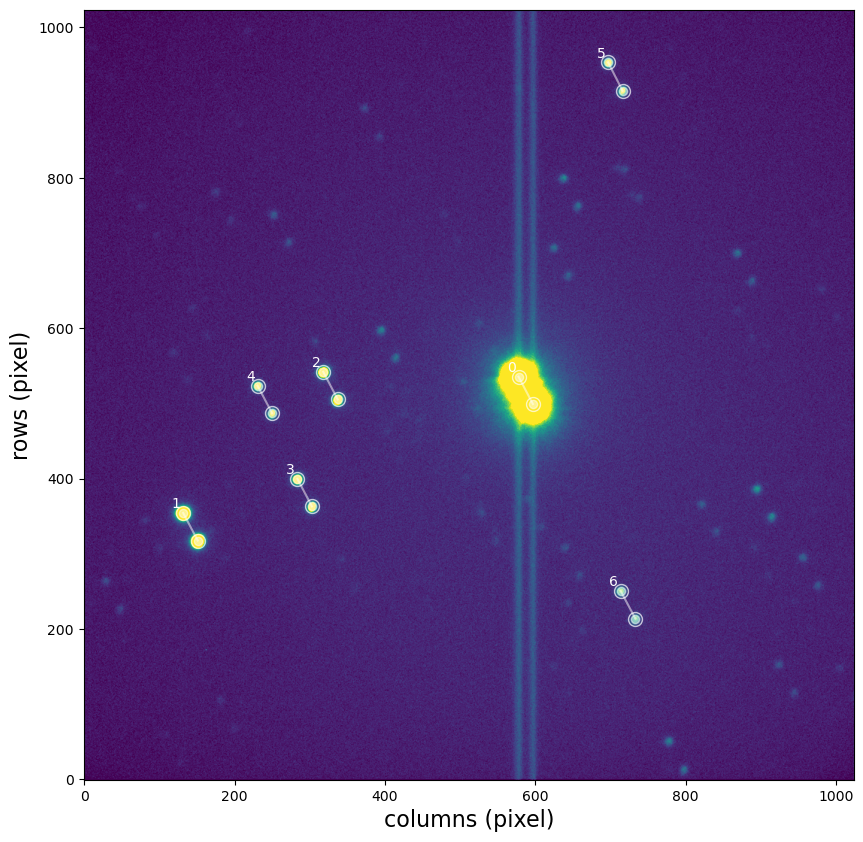

In [6]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [7]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,227.005492,-40.139165,596.754619,499.140134,8.291570,8.291570,-17.771286,0.000914,-15.098284,0.000311,10,0
1,1,227.059838,-40.156938,151.016905,317.614535,8.557363,8.557363,-13.807001,0.011436,-15.085228,0.000147,10,0
2,2,227.037562,-40.139002,337.202113,505.275838,8.555105,8.555105,-12.451224,0.036542,-15.086872,0.000139,10,0
3,3,227.041449,-40.152494,302.912700,362.960007,8.605800,8.605800,-12.000859,0.054590,-15.086613,0.000133,10,0
4,4,227.048244,-40.140885,249.940929,486.915777,8.532745,8.532745,-11.487961,0.086663,-15.085662,0.000140,10,0
5,5,226.991800,-40.099756,715.954619,915.838965,8.236870,8.236870,-11.445775,0.089969,-15.084040,0.000133,10,0
6,6,226.988173,-40.165802,733.048183,213.752729,8.824467,8.824467,-10.854494,0.154308,-15.087742,0.000139,10,0


Below we select the source with its index number assigned as the main target to be analyzed. Then we select other stars as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

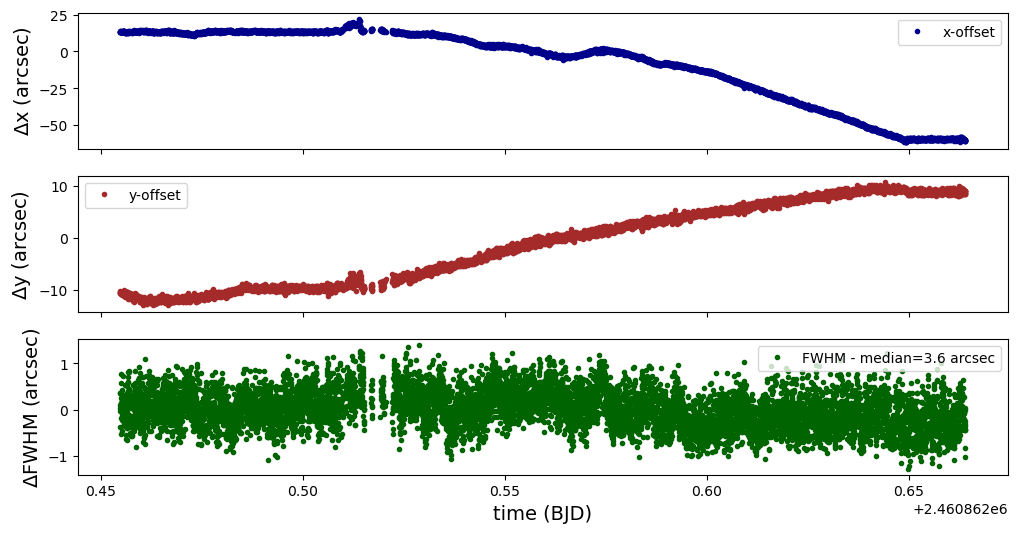

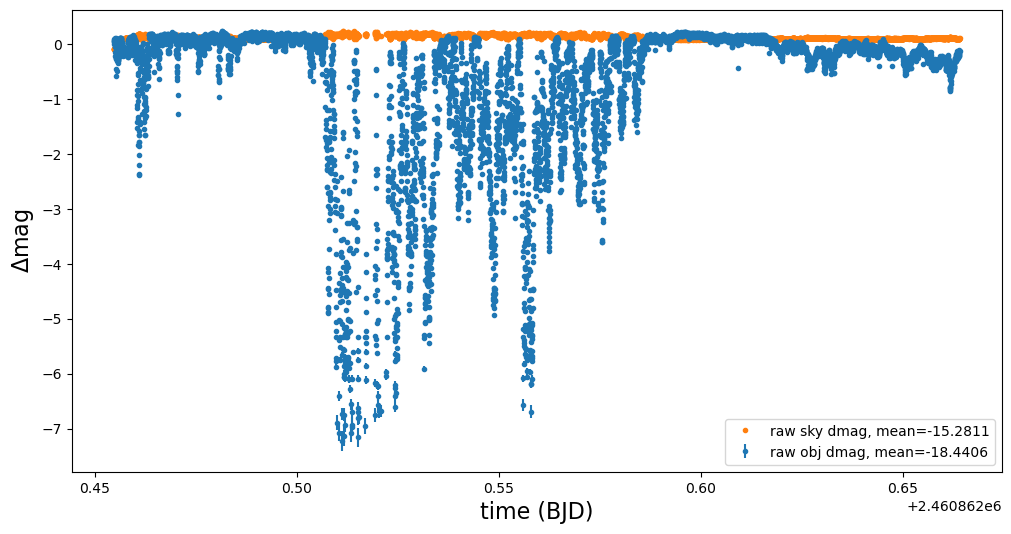

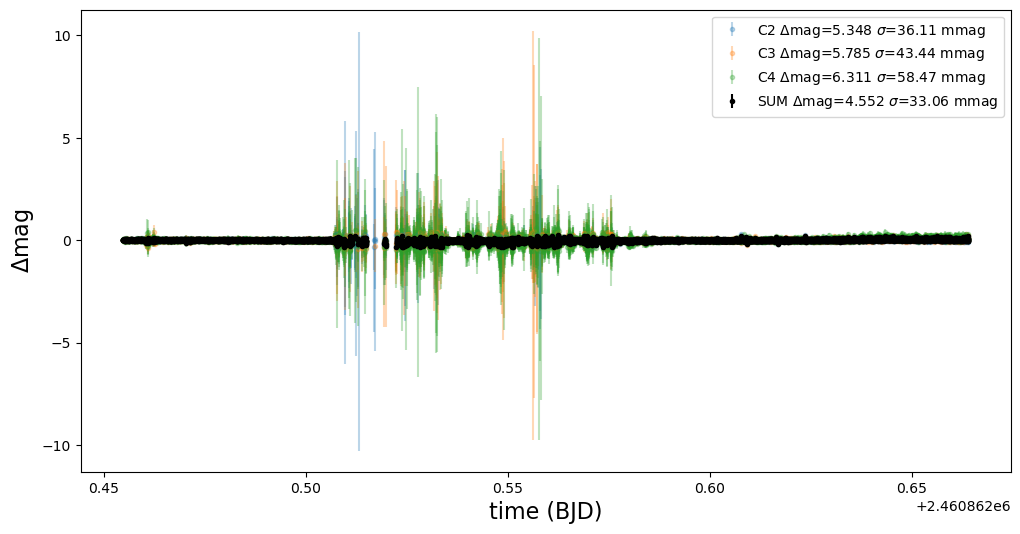

       TIME                x          ...       diffmagsum      
------------------ ------------------ ... ----------------------
2460862.4547874206  587.2126014469559 ...   0.021706241385841096
2460862.4548017723  587.2126014469559 ... -0.0032532710498287543
 2460862.454836376  587.7126014469559 ...   0.006530899335963625
 2460862.454850727  587.9626014469559 ...   0.017620687651335842
2460862.4548839536  588.2126014469559 ...   0.016804311462122357
2460862.4548983052  587.7126014469559 ...    0.00708691222602198
2460862.4549313462  588.7126014469559 ...    -0.0162800715486906
               ...                ... ...                    ...
 2460862.663880539 366.71260144695583 ...    0.04487893543856991
2460862.6639149226 366.96260144695583 ...    -0.0285117395989829
 2460862.663929043 367.46260144695583 ...  -0.011871817340621149
 2460862.663966435 367.96260144695583 ...    0.08668101474418854
2460862.6639805553 365.46260144695583 ...   0.013448500153184995
2460862.6640127976 366.71

In [8]:
catalog = 'CATALOG_PHOT_AP010'
target=0
comps=[2,3,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [9]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs2/20250705_s4c2_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU   50409   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU  67258   7R x 33623C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE8394,EFE8394,FO8395,EFO8395,FE8395,EFE8395,FO8396,EFO8396,FE8396,EFE8396
0,2.0,10.0,0.0,227.005492,-40.139165,577.670584,535.521107,596.754619,499.140134,7.503843,...,1.082529e+07,11113.888805,1.208749e+07,11672.334782,1.072413e+07,11071.948074,1.239275e+07,11806.288601,1.097401e+07,11183.244859
1,2.0,10.0,1.0,227.059838,-40.156938,131.693524,354.261452,151.016905,317.614535,7.637782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,10.0,2.0,227.037562,-40.139002,318.033267,541.897522,337.202113,505.275838,7.260657,...,7.954659e+04,3913.136867,9.164896e+04,3935.861138,7.585025e+04,3920.252803,9.017641e+04,3936.107415,7.538944e+04,3911.181658
3,2.0,10.0,3.0,227.041449,-40.152494,283.696162,399.492895,302.912700,362.960007,7.244143,...,4.918351e+04,3874.944668,5.442824e+04,3888.243891,4.835923e+04,3883.360107,5.601094e+04,3887.288836,4.776182e+04,3880.104857
4,2.0,10.0,4.0,227.048244,-40.140885,230.567182,523.543692,249.940929,486.915777,7.233272,...,2.685551e+04,3846.279743,3.233205e+04,3858.683480,2.890400e+04,3862.176381,3.577299e+04,3859.606757,3.129748e+04,3852.457768
5,2.0,10.0,5.0,226.991800,-40.099756,696.854090,953.383230,715.954619,915.838965,7.221346,...,3.020558e+04,3844.065295,3.274903e+04,3862.525586,3.138947e+04,3859.874557,3.838161e+04,3859.959555,2.753877e+04,3853.563954
6,2.0,10.0,6.0,226.988173,-40.165802,713.507366,250.491501,733.048183,213.752729,7.381881,...,1.942768e+04,3841.306113,1.967132e+04,3849.502052,1.652362e+04,3846.634505,2.621984e+04,3856.848372,2.000442e+04,3850.416500


Then we can print all column names to check the data available in each catalog

In [11]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE8394', 'EFE8394', 'FO8395', 'EFO8395', 'FE8395', 'EFE8395', 'FO8396',
       'EFO8396', 'FE8396', 'EFE8396'],
      dtype='object', length=33623)

Finally, we can select the source of interest and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-10-10 15:27:55,086 astropop - INFO - Normalization disabled.  [__init__]


2025-10-10 15:27:55,086 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-10-10 15:27:55,441 root - INFO - Source index: i=0   [pipeline_lib]


2025-10-10 15:27:55,441 | INFO | Source index: i=0 


2025-10-10 15:27:55,442 root - INFO - Source RA=227.0054921134981 Dec=-40.13916514154001 mag=-28.20483+-0.00001  [pipeline_lib]


2025-10-10 15:27:55,442 | INFO | Source RA=227.0054921134981 Dec=-40.13916514154001 mag=-28.20483+-0.00001


2025-10-10 15:27:55,443 root - INFO - Best aperture radius: 20.0 pixels  [pipeline_lib]


2025-10-10 15:27:55,443 | INFO | Best aperture radius: 20.0 pixels


2025-10-10 15:27:55,444 root - INFO - Polarization in Q: 0.00275+-0.00004  [pipeline_lib]


2025-10-10 15:27:55,444 | INFO | Polarization in Q: 0.00275+-0.00004


2025-10-10 15:27:55,444 root - INFO - Polarization in U: -0.00039+-0.00006  [pipeline_lib]


2025-10-10 15:27:55,444 | INFO | Polarization in U: -0.00039+-0.00006


2025-10-10 15:27:55,445 root - INFO - Polarization in V: -0.00001+-0.00003  [pipeline_lib]


2025-10-10 15:27:55,445 | INFO | Polarization in V: -0.00001+-0.00003


2025-10-10 15:27:55,445 root - INFO - Total linear polarization p: 0.00278+-0.00004  [pipeline_lib]


2025-10-10 15:27:55,445 | INFO | Total linear polarization p: 0.00278+-0.00004


2025-10-10 15:27:55,446 root - INFO - Angle of polarization theta: 176.0+-0.4 deg  [pipeline_lib]


2025-10-10 15:27:55,446 | INFO | Angle of polarization theta: 176.0+-0.4 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-10-10 15:27:55,447 root - INFO - Free constant k: 1.1323086859733575+-0.0  [pipeline_lib]


2025-10-10 15:27:55,447 | INFO | Free constant k: 1.1323086859733575+-0.0


2025-10-10 15:27:55,447 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-10-10 15:27:55,447 | INFO | Zero of polarization: 27.2+-0.0


2025-10-10 15:27:55,448 root - INFO - RMS of zi residuals: 0.007802958052583344  [pipeline_lib]


2025-10-10 15:27:55,448 | INFO | RMS of zi residuals: 0.007802958052583344


2025-10-10 15:27:55,448 root - INFO - Reduced chi-square (n=8397.0, DOF=8394.0): 6.06  [pipeline_lib]


2025-10-10 15:27:55,448 | INFO | Reduced chi-square (n=8397.0, DOF=8394.0): 6.06


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-10-10 15:27:55,762 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:27:55,762 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:27:55,768 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:27:55,768 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:27:55,997 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:27:55,997 | INFO | Substituting symbol \perp from STIXGeneral


2025-10-10 15:27:56,003 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-10-10 15:27:56,003 | INFO | Substituting symbol \perp from STIXGeneral


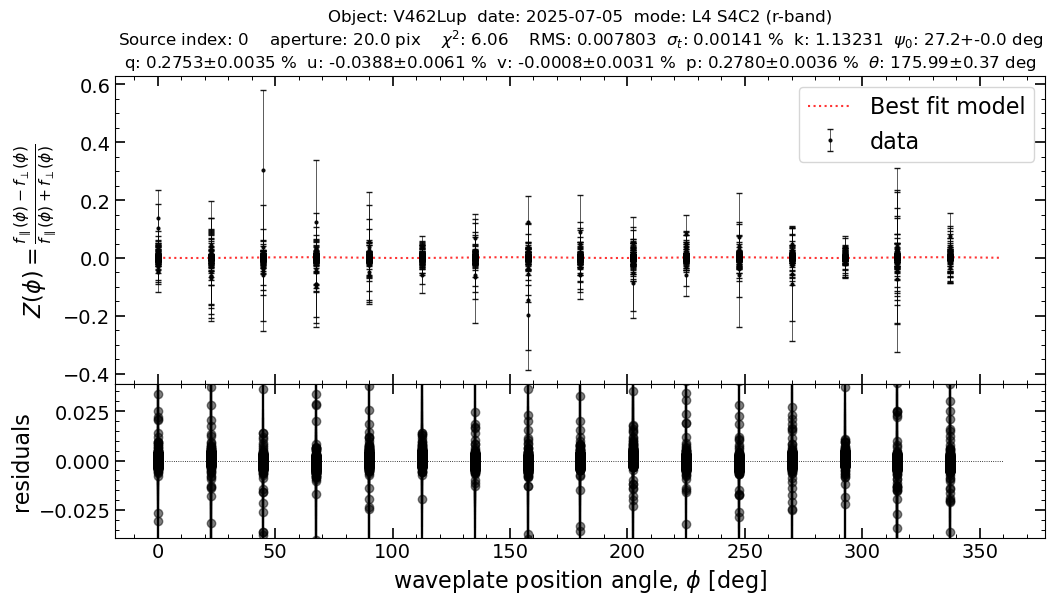

In [12]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [13]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250705/sparc4acs2/20250705_s4c2_Gain2_1.0_Conventional_2_V462Lup_POLAR_L4_polar.fits
SOURCE_INDEX : 0
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 6
APERTURE_RADIUS : 20.0
NEXPS : 8397
MAG : -28.20483+-0.00001
RA : 227.0054921134981
DEC : -40.13916514154001
FWHM : 7.503842627836493
X1 : 577.6705841274311
Y1 : 535.5211067621817
X2 : 596.7546187664806
Y2 : 499.14013429825167
WAVEPLATE_ANGLES : [ 0.   0.  22.5 ...  0.  22.5 22.5]
ZI : [0.0027+-0.0006, 0.0023+-0.0006, 0.0019+-0.0006, ..., -0.0030+-0.0008,
 -0.0029+-0.0008, -0.0019+-0.0008]
FO : [15730000+-10000, 16250000+-10000, 16410000+-10000, ..., 13060000+-10000,
 12880000+-10000, 13130000+-10000]
FE : [13820000+-10000, 14280000+-10000, 14440000+-10000, ..., 11600000+-10000,
 11440000+-10000, 11640000+-10000]
OBSERVED_MODEL : [0.00075591 0.00075591 0.0001437  ... 0.00075591 0.0001437  0.0001437 ]
Q : 0.00275+-0.00004
U : -0.00039+-0.00006
V : -0.00001+-0.00003
P : 0.00278

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [14]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.278+-0.004 %  Angle of polarization: 176.0+-0.4 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [15]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [16]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

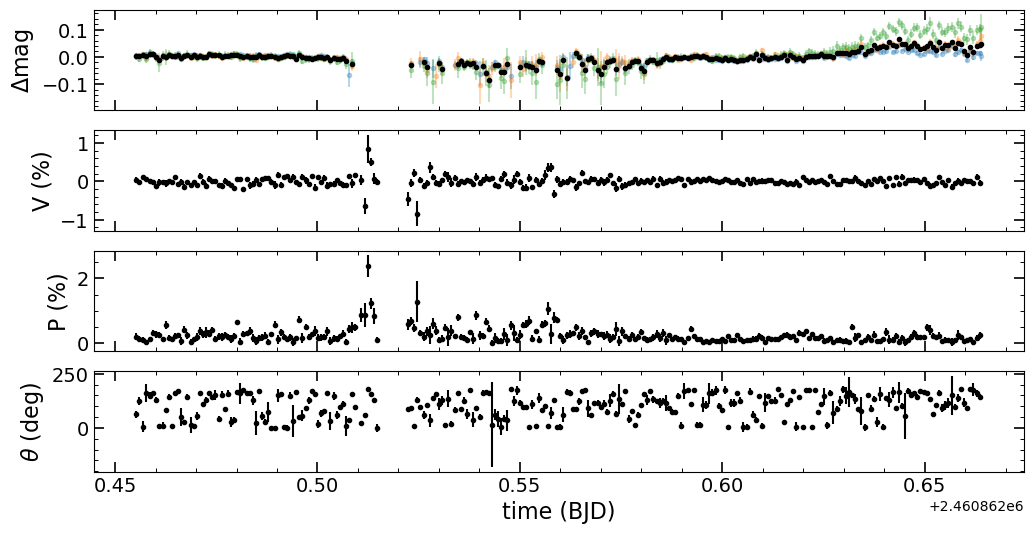

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.006110265531436454,0.005225483772056819,0.004810454937677733,0.0077047393057703435,0.002614619527182782,0.012349051714295602,2460862.4551561465,577.6705841274311,535.5211067621817,596.7546187664806,499.14013429825167,7.661296939828788,-22.21567289693229,0.00011912109535882491,-17.657114217497874,0.015463673469075203,0.0038855916544893176,0.002011835810757119,0.0010596300306783626,62.7226842797796,15.063564688211939
0.004902465073069351,0.0051439429661432464,0.005720187862204185,0.007597842391021601,-0.006771836363357764,0.012058066083271547,2460862.4560096827,578.9205841274311,534.2711067621817,598.0046187664806,497.89013429825167,7.380134921626748,-22.23016391833208,0.00011820493923110502,-17.673764861538555,0.015150656707988177,0.001725969013600448,0.0014527131323611752,0.0009013252842364116,125.25007268502651,17.744661733224035
0.009640676170228346,0.004917124439295135,0.009088672928418973,0.007249335143393259,0.005572202501667789,0.01159426813458754,2460862.456781737,576.4205841274311,534.2711067621817,595.5046187664806,497.89013429825167,8.012106472154924,-22.2771093290285,0.00011535036611403029,-17.714893759356947,0.014529903964877888,0.007542481891627872,0.0010039081591080832,0.0008202717628283013,6.424479798180829,23.368444816438316
0.01254896449850662,0.006324607871182787,-0.002925573058620401,0.009222990673126508,-0.006261443308478221,0.014791219361614222,2460862.457723607,578.4205841274311,534.2711067621817,597.5046187664806,497.89013429825167,7.393665472467454,-22.21770540654628,0.0001310803622012096,-17.660336904373885,0.018541651644342065,0.0026954143924680096,0.0004505527160519852,0.0006681199733089368,161.9274241843121,42.41064487208833
0.014452370030372919,0.0053197195627843995,0.005324334959388111,0.007787879051922586,0.016624397518331335,0.012635591294601027,2460862.4586612117,576.9205841274311,533.2711067621817,596.0046187664806,496.89013429825167,7.536579080838702,-22.38024457584798,0.00012082491316332522,-17.814745435409232,0.01576593948165856,0.010826052658819307,0.0013357271962357396,0.0007005378613314127,148.7267110216663,14.999606873724538
0.010658245593941018,0.005431576295884912,0.012461913436721872,0.00803064421100478,0.010213838222849603,0.012875511948510644,2460862.4594276873,578.1705841274311,532.0211067621817,597.2546187664806,495.64013429825167,8.169000808184748,-22.354540747530752,0.0001224464096259443,-17.789830293743513,0.016116050883151024,0.010037366007312087,0.0032420457269358746,0.0007436778022419827,160.46240060913945,6.560421084567076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.009772985911290277,0.007317522669989931,0.01763425650820416,0.010909064449570953,0.06808848283984759,0.01839472142493286,2460862.659712538,359.9205841274311,594.5211067621817,379.0046187664806,558.1401342982517,6.7064491971081885,-22.02981858615123,0.00014472050662480912,-17.452611632307722,0.022602140814898048,0.022533866063580987,0.0007645460045633107,0.0005763907414245888,117.09679542333544,21.561521617209845
-0.011066945007076612,0.007652731125209364,0.0073770896129605745,0.0115274251000728,0.06513251592014413,0.019570113287590948,2460862.660481843,360.9205841274311,594.2711067621817,380.0046187664806,557.8901342982517,6.427528477168833,-21.959811901587013,0.0001501108064672733,-17.396639943361187,0.023965966649376478,0.008498870445899698,0.0010632510039454382,0.00037238425111518997,93.02714015307778,10.01662781636175


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[2,3,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)